# India News Extractor

**NLTK** Download if needed all the nltk repository databases from here: http://www.nltk.org/nltk_data/. Place these under the nltk_data directory in the structure required by the error message. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

## Reading in a URL

Let's read in the top news from the ET main page. 

You also want to get SelectorGadget: http://selectorgadget.com/

In [4]:
import requests
from lxml.html import fromstring

In [35]:
#Copy the URL from the web site
url = 'https://economictimes.indiatimes.com/budget2018'
html = requests.get(url, timeout=10).text

#See: http://infohost.nmt.edu/~shipman/soft/pylxml/web/etree-fromstring.html
doc = fromstring(html)    

#http://lxml.de/cssselect.html#the-cssselect-method
doc.cssselect(".list-none")


[<Element ul at 0x118aaec78>]

In [36]:
x = doc.cssselect(".list-none li")    #Try a, h2, section if you like
headlines = [x[j].text_content() for j in range(len(x))]
headlines = headlines[:20]   #Needed to exclude any other stuff that was not needed. 
print(headlines)

['Budget highlights: Jaitley does delicate jugglery to steady post-GST India', 'Tax, other benefits proposed for seniors: Rs 50K interest income exempted', 'Budget 2018 decoded: 15 goods, 3 bads and one ugly move from Jaitley', 'FM proposes to re-introduce LTCG tax on gains up to Rs 1 lakh', "Budget 2018 hikes cess on income tax to 4% from 3%: Here's how much you will pay more", 'Government aiming to set up 5 lakh hotspots, allocates Rs 10000 crore', "Startups' hope for a miracle dashed as Angel Tax left out of Budget 2018", 'More budget allocation to help increase farmer income: Harsimrat Kaur Badal', 'Corporate tax rate reduced to 25% for companies with turnover of up to Rs 250 crore', 'Budget outlines 372-point ease of biz plan for states', 'New women workers take home pay to go up as EPF contribution capped at 8%', 'Arun Jaitley decides to ride the bull, brings back LTCG tax', 'Emoluments of MPs to be revised every 5 years automatically', 'Disinvestment proceeds to reach Rs 1 lakh 

So, now we have all the ET news headlines for top news

## Sentiment Scoring

### Load in Harvard Inquirer Dictionary

In [37]:
## Here we will read in an entire dictionary from Harvard Inquirer
f = open('inqdict.txt')
HIDict = f.read()
HIDict = HIDict.splitlines()
HIDict = HIDict[1:]
print(HIDict[:5])
print(len(HIDict))

#Extract all the lines that contain the Pos tag
poswords = [j for j in HIDict if "Pos" in j]  #using a list comprehension
poswords = [j.split()[0] for j in poswords]
poswords = [j.split("#")[0] for j in poswords]
poswords = unique(poswords)
poswords = [j.lower() for j in poswords]
print(poswords[:20])
print(len(poswords))

#Extract all the lines that contain the Neg tag
negwords = [j for j in HIDict if "Neg" in j]  #using a list comprehension
negwords = [j.split()[0] for j in negwords]
negwords = [j.split("#")[0] for j in negwords]
negwords = unique(negwords)
negwords = [j.lower() for j in negwords]
print(negwords[:20])
print(len(negwords))

['A H4Lvd DET ART  | article: Indefinite singular article--some or any one', 'ABANDON H4Lvd Neg Ngtv Weak Fail IAV AFFLOSS AFFTOT SUPV  |', 'ABANDONMENT H4 Neg Weak Fail Noun  |', 'ABATE H4Lvd Neg Psv Decr IAV TRANS SUPV  |', 'ABATEMENT Lvd Noun  ']
11895
['abide', 'able', 'abound', 'absolve', 'absorbent', 'absorption', 'abundance', 'abundant', 'accede', 'accentuate', 'accept', 'acceptable', 'acceptance', 'accessible', 'accession', 'acclaim', 'acclamation', 'accolade', 'accommodate', 'accommodation']
1646
['abandon', 'abandonment', 'abate', 'abdicate', 'abhor', 'abject', 'abnormal', 'abolish', 'abominable', 'abrasive', 'abrupt', 'abscond', 'absence', 'absent', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'abuse', 'abyss']
2120


### Create Sentiment Scoring Function

In [38]:
def textSentiment(text,poswords,negwords):   
    text.lower(); print(text)
    text = text.split(' ')
    posmatches = set(text).intersection(set(poswords)); print(posmatches)
    negmatches = set(text).intersection(set(negwords)); print(negmatches)
    return [len(posmatches),len(negmatches)]

In [39]:
for h in headlines:
    s = textSentiment(h,poswords,negwords)
    print(s)

Budget highlights: Jaitley does delicate jugglery to steady post-GST India
{'delicate', 'steady'}
set()
[2, 0]
Tax, other benefits proposed for seniors: Rs 50K interest income exempted
{'interest'}
set()
[1, 0]
Budget 2018 decoded: 15 goods, 3 bads and one ugly move from Jaitley
set()
{'ugly'}
[0, 1]
FM proposes to re-introduce LTCG tax on gains up to Rs 1 lakh
set()
{'tax'}
[0, 1]
Budget 2018 hikes cess on income tax to 4% from 3%: Here's how much you will pay more
{'pay'}
{'tax'}
[1, 1]
Government aiming to set up 5 lakh hotspots, allocates Rs 10000 crore
set()
set()
[0, 0]
Startups' hope for a miracle dashed as Angel Tax left out of Budget 2018
{'miracle', 'hope'}
set()
[2, 0]
More budget allocation to help increase farmer income: Harsimrat Kaur Badal
{'help'}
{'help'}
[1, 1]
Corporate tax rate reduced to 25% for companies with turnover of up to Rs 250 crore
set()
{'tax'}
[0, 1]
Budget outlines 372-point ease of biz plan for states
{'ease'}
set()
[1, 0]
New women workers take home p

### Remove punctuation from headlines

In [40]:
import string
def removePuncStr(s):
    for c in string.punctuation:
        s = s.replace(c," ")
    return s

def removePunc(text_array):
    return [removePuncStr(h) for h in text_array]

In [41]:
headlines = removePunc(headlines)
headlines

['Budget highlights  Jaitley does delicate jugglery to steady post GST India',
 'Tax  other benefits proposed for seniors  Rs 50K interest income exempted',
 'Budget 2018 decoded  15 goods  3 bads and one ugly move from Jaitley',
 'FM proposes to re introduce LTCG tax on gains up to Rs 1 lakh',
 'Budget 2018 hikes cess on income tax to 4  from 3   Here s how much you will pay more',
 'Government aiming to set up 5 lakh hotspots  allocates Rs 10000 crore',
 'Startups  hope for a miracle dashed as Angel Tax left out of Budget 2018',
 'More budget allocation to help increase farmer income  Harsimrat Kaur Badal',
 'Corporate tax rate reduced to 25  for companies with turnover of up to Rs 250 crore',
 'Budget outlines 372 point ease of biz plan for states',
 'New women workers take home pay to go up as EPF contribution capped at 8 ',
 'Arun Jaitley decides to ride the bull  brings back LTCG tax',
 'Emoluments of MPs to be revised every 5 years automatically',
 'Disinvestment proceeds to rea

### Remove numbers

In [42]:
def removeNumbersStr(s):
    for c in range(10):
        n = str(c)
        s = s.replace(n," ")
    return s

def removeNumbers(text_array):
    return [removeNumbersStr(h) for h in text_array]

In [43]:
headlines = removeNumbers(headlines)
headlines

['Budget highlights  Jaitley does delicate jugglery to steady post GST India',
 'Tax  other benefits proposed for seniors  Rs   K interest income exempted',
 'Budget      decoded     goods    bads and one ugly move from Jaitley',
 'FM proposes to re introduce LTCG tax on gains up to Rs   lakh',
 'Budget      hikes cess on income tax to    from     Here s how much you will pay more',
 'Government aiming to set up   lakh hotspots  allocates Rs       crore',
 'Startups  hope for a miracle dashed as Angel Tax left out of Budget     ',
 'More budget allocation to help increase farmer income  Harsimrat Kaur Badal',
 'Corporate tax rate reduced to     for companies with turnover of up to Rs     crore',
 'Budget outlines     point ease of biz plan for states',
 'New women workers take home pay to go up as EPF contribution capped at   ',
 'Arun Jaitley decides to ride the bull  brings back LTCG tax',
 'Emoluments of MPs to be revised every   years automatically',
 'Disinvestment proceeds to rea

### Stemming

https://pythonprogramming.net/stemming-nltk-tutorial/

In [44]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

def stemText(text_array):
    stemmed_text = []
    for h in text_array:
        words = word_tokenize(h)
        h2 = ''
        for w in words:
            h2 = h2 + ' ' + PorterStemmer().stem(w)
        stemmed_text.append(h2)
    return stemmed_text

In [45]:
stemmed_headlines = stemText(headlines)
stemmed_headlines

[' budget highlight jaitley doe delic juggleri to steadi post gst india',
 ' tax other benefit propos for senior Rs K interest incom exempt',
 ' budget decod good bad and one ugli move from jaitley',
 ' FM propos to re introduc ltcg tax on gain up to Rs lakh',
 ' budget hike cess on incom tax to from here s how much you will pay more',
 ' govern aim to set up lakh hotspot alloc Rs crore',
 ' startup hope for a miracl dash as angel tax left out of budget',
 ' more budget alloc to help increas farmer incom harsimrat kaur badal',
 ' corpor tax rate reduc to for compani with turnov of up to Rs crore',
 ' budget outlin point eas of biz plan for state',
 ' new women worker take home pay to go up as epf contribut cap at',
 ' arun jaitley decid to ride the bull bring back ltcg tax',
 ' emolu of mp to be revis everi year automat',
 ' disinvest proce to reach Rs lakh crore thi fiscal Rs crore for FY',
 ' aadhaar like uniqu ident mull for busi',
 ' arun jaitley pleas the offic goer with standard 

### Remove Stopwords

Reference: https://pythonprogramming.net/stop-words-nltk-tutorial/

In [46]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def stopText(text_array):
    stop_words = set(stopwords.words('english'))
    stopped_text = []
    for h in text_array:
        words = word_tokenize(h)
        h2 = ''
        for w in words:
            if w not in stop_words:
                h2 = h2 + ' ' + w
        stopped_text.append(h2)
    return stopped_text

In [48]:
stopped_headlines = stopText(headlines)
stopped_headlines

[' Budget highlights Jaitley delicate jugglery steady post GST India',
 ' Tax benefits proposed seniors Rs K interest income exempted',
 ' Budget decoded goods bads one ugly move Jaitley',
 ' FM proposes introduce LTCG tax gains Rs lakh',
 ' Budget hikes cess income tax Here much pay',
 ' Government aiming set lakh hotspots allocates Rs crore',
 ' Startups hope miracle dashed Angel Tax left Budget',
 ' More budget allocation help increase farmer income Harsimrat Kaur Badal',
 ' Corporate tax rate reduced companies turnover Rs crore',
 ' Budget outlines point ease biz plan states',
 ' New women workers take home pay go EPF contribution capped',
 ' Arun Jaitley decides ride bull brings back LTCG tax',
 ' Emoluments MPs revised every years automatically',
 ' Disinvestment proceeds reach Rs lakh crore fiscal Rs crore FY',
 ' Aadhaar like unique identity mulled business',
 ' Arun Jaitley pleases office goer standard deduction',
 ' Section D limit proposed hiked Rs senior citizens',
 ' Finan

### Write all docs to separate text files

In [49]:
def write2textfile(s,filename):
    text_file = open(filename, "w")
    text_file.write(s)
    text_file.close()

In [50]:
j = 0
for h in headlines:
    j = j + 1
    fname = "CTEXT/" + str(j) + ".ctxt"  #using "ctxt" to denote a corpus related file
    write2textfile(h,fname)

## Create a Corpus

In [51]:
#Read in the corpus
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'CTEXT/'
ctext = PlaintextCorpusReader(corpus_root, '.*')

In [52]:
ctext

<PlaintextCorpusReader in '/Users/srdas/GoogleDrive/Teaching/ISB/2018/IDTF-FinTech/Session7_TextMining_RegTech/CTEXT'>

In [53]:
ctext.fileids()

['1.ctxt',
 '10.ctxt',
 '11.ctxt',
 '12.ctxt',
 '13.ctxt',
 '14.ctxt',
 '15.ctxt',
 '16.ctxt',
 '17.ctxt',
 '18.ctxt',
 '19.ctxt',
 '2.ctxt',
 '20.ctxt',
 '3.ctxt',
 '4.ctxt',
 '5.ctxt',
 '6.ctxt',
 '7.ctxt',
 '8.ctxt',
 '9.ctxt']

In [54]:
ctext.words('1.ctxt')

['Budget', 'highlights', 'Jaitley', 'does', 'delicate', ...]

In [55]:
ctext.words('2.ctxt')

['Tax', 'other', 'benefits', 'proposed', 'for', ...]

## Term Document Matrix

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

docs = headlines
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
tdm = df.T
print(tdm.info())
print(tdm)

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, aadhaar to you
Data columns (total 20 columns):
0     146 non-null int64
1     146 non-null int64
2     146 non-null int64
3     146 non-null int64
4     146 non-null int64
5     146 non-null int64
6     146 non-null int64
7     146 non-null int64
8     146 non-null int64
9     146 non-null int64
10    146 non-null int64
11    146 non-null int64
12    146 non-null int64
13    146 non-null int64
14    146 non-null int64
15    146 non-null int64
16    146 non-null int64
17    146 non-null int64
18    146 non-null int64
19    146 non-null int64
dtypes: int64(20)
memory usage: 24.0+ KB
None
               0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  \
aadhaar         0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   
aiming          0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
allocates       0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
allocation      0   0   

## TfIdf 

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tfidf = TfidfVectorizer(headlines)

In [59]:
tfs = tfidf.fit_transform(headlines)

In [60]:
tfs

<20x146 sparse matrix of type '<class 'numpy.float64'>'
	with 208 stored elements in Compressed Sparse Row format>

In [61]:
tdm_mat = tfs.toarray().T
print(tdm_mat.shape)
tdm_mat

(146, 20)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [62]:
tdm_mat[1][14]   #Check for corresponding element in the TDM vs TFIDF matrix

0.0

## WordClouds

In [63]:
text = ''
for h in headlines:
    text = text + ' ' + h
print(text)

 Budget highlights  Jaitley does delicate jugglery to steady post GST India Tax  other benefits proposed for seniors  Rs   K interest income exempted Budget      decoded     goods    bads and one ugly move from Jaitley FM proposes to re introduce LTCG tax on gains up to Rs   lakh Budget      hikes cess on income tax to    from     Here s how much you will pay more Government aiming to set up   lakh hotspots  allocates Rs       crore Startups  hope for a miracle dashed as Angel Tax left out of Budget      More budget allocation to help increase farmer income  Harsimrat Kaur Badal Corporate tax rate reduced to     for companies with turnover of up to Rs     crore Budget outlines     point ease of biz plan for states New women workers take home pay to go up as EPF contribution capped at    Arun Jaitley decides to ride the bull  brings back LTCG tax Emoluments of MPs to be revised every   years automatically Disinvestment proceeds to reach Rs   lakh crore this fiscal  Rs        crore for F

(-0.5, 399.5, 199.5, -0.5)

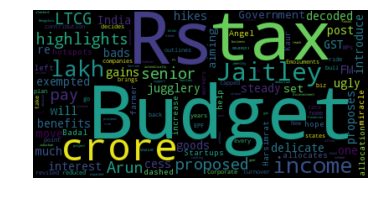

In [65]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)

#Use pyplot from matplotlib
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

(-0.5, 399.5, 199.5, -0.5)

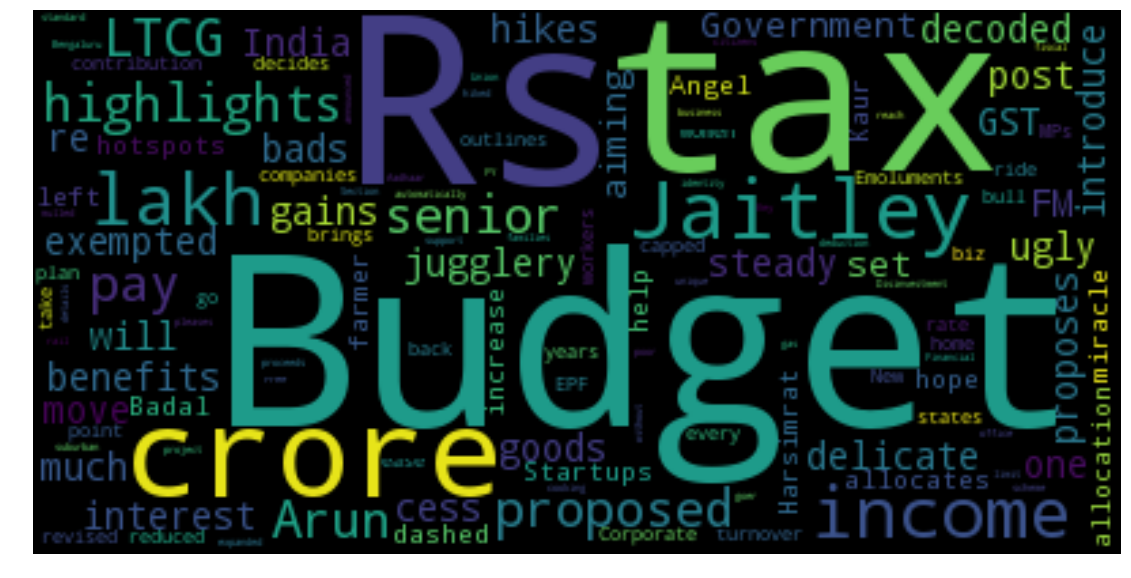

In [66]:
figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

# =========================
# Big Data: Reuters News Corpus

https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/reuters.zip

The Reuters-21578 benchmark corpus, ApteMod 

id: reuters; size: 6378691; author: ; copyright: ; license: The copyright for the text of newswire articles and Reuters annotations in the Reuters-21578 collection resides with Reuters Ltd. Reuters Ltd. and Carnegie Group, Inc. have agreed to allow the free distribution of this data *for research purposes only*. If you publish results based on this data set, please acknowledge its use, refer to the data set by the name 'Reuters-21578, Distribution 1.0', and inform your readers of the current location of the data set.;

https://pynlp.wordpress.com/2013/12/10/unit-5-part-ii-working-with-files-ii-the-plain-text-corpus-reader-of-nltk/

In [67]:
#Read in the corpus
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'reuters/training/'
ctext = PlaintextCorpusReader(corpus_root, '.*')

In [68]:
#How many docs, paragraphs, sentences, words, characters? 
print(len(ctext.fileids()))
print(len(ctext.paras()))
print(len(ctext.sents()))
print(len(ctext.words()))
print(len(ctext.raw()))

7769
8471
40277
1253696
6478471


In [70]:
#Convert corpus to text array with a full string for each doc
def merge_arrays(word_lists):
    wordlist = []
    for wl in word_lists:
        wordlist = wordlist + wl
    doc = ' '.join(wordlist)
    return doc

In [71]:
#Run this through the corpus to get a word array for each doc
text_array = []
for p in ctext.paras():
    doc = merge_arrays(p)
    text_array.append(doc)

In [72]:
#Show the array sample
print(len(text_array))

8471


In [73]:
#Clean up the docs using the previous functions
news = text_array
news = removePunc(news)
news = removeNumbers(news)
news = stopText(news)
#news = stemText(news)
news = [j.lower() for j in news]
news[:10]

[' bahia cocoa review showers continued throughout week bahia cocoa zone alleviating drought since early january improving prospects coming temporao although normal humidity levels restored comissaria smith said weekly review the dry period means temporao late year arrivals week ended february bags kilos making cumulative total season mln stage last year again seems cocoa delivered earlier consignment included arrivals figures comissaria smith said still doubt much old crop cocoa still available harvesting practically come end with total bahia crop estimates around mln bags sales standing almost mln hundred thousand bags still hands farmers middlemen exporters processors there doubts much cocoa would fit export shippers experiencing dificulties obtaining bahia superior certificates in view lower quality recent weeks farmers sold good part cocoa held consignment comissaria smith said spot bean prices rose cruzados per arroba kilos bean shippers reluctant offer nearby shipment limited sa

In [74]:
#Make it into a TFIDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(text_array)
tfs = tfidf.fit_transform(text_array)
tdm_mat = tfs.toarray().T
print(tdm_mat.shape)

(26283, 8471)


In [75]:
#Create plain TDM
from sklearn.feature_extraction.text import CountVectorizer

docs = news
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
tdm = df.T
tdm.shape

(24670, 8471)

In [76]:
tdm.iloc[2000:2050,0:50]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
bathurst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
batm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
battered,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
batteries,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
battering,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
battery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
battle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
battlefield,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
battles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
battleships,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Topic Modeling using LDA

This is a nice article that has most of what is needed: 
https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

In [78]:
#Clean and process news documents into shape for LDA
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in news]

In [80]:
print(len(doc_clean))
type(doc_clean)

8471


list

In [83]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
size(doc_term_matrix)

8471

In [84]:
%%time 
#RUN THE MODEL
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

CPU times: user 11min 12s, sys: 2.86 s, total: 11min 15s
Wall time: 9min 38s


In [85]:
#Results
print(ldamodel.print_topics(num_topics=3, num_words=10))

[(0, '0.040*"said" + 0.019*"lt" + 0.018*"company" + 0.017*"dlrs" + 0.016*"share" + 0.010*"mln" + 0.010*"pct" + 0.008*"inc" + 0.008*"corp" + 0.007*"stock"'), (1, '0.029*"said" + 0.015*"pct" + 0.012*"u" + 0.010*"year" + 0.010*"billion" + 0.009*"bank" + 0.008*"mln" + 0.007*"market" + 0.007*"trade" + 0.007*"would"'), (2, '0.092*"v" + 0.080*"mln" + 0.059*"ct" + 0.045*"net" + 0.042*"loss" + 0.036*"dlrs" + 0.026*"shr" + 0.024*"profit" + 0.022*"lt" + 0.021*"year"')]


## Word2Vec: Word Embeddings

https://en.wikipedia.org/wiki/Word2vec

https://rare-technologies.com/word2vec-tutorial/

https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [86]:
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [88]:
#Clean up the docs using the previous functions
news = text_array
news = removePunc(news)
news = removeNumbers(news)
news = stopText(news)
news = stemText(news)
news = [j.lower() for j in news]

In [89]:
print(len(news))
news[:3]

8471


[' bahia cocoa review shower continu throughout week bahia cocoa zone allevi drought sinc earli januari improv prospect come temporao although normal humid level restor comissaria smith said weekli review the dri period mean temporao late year arriv week end februari bag kilo make cumul total season mln stage last year again seem cocoa deliv earlier consign includ arriv figur comissaria smith said still doubt much old crop cocoa still avail harvest practic come end with total bahia crop estim around mln bag sale stand almost mln hundr thousand bag still hand farmer middlemen export processor there doubt much cocoa would fit export shipper experienc dificulti obtain bahia superior certif in view lower qualiti recent week farmer sold good part cocoa held consign comissaria smith said spot bean price rose cruzado per arroba kilo bean shipper reluct offer nearbi shipment limit sale book march shipment dlr per tonn port name new crop sale also light open port june juli go dlr dlr new york j

In [90]:
#Tokenize each document
def textTokenize(text_array):
    textTokens = []
    for h in text_array:
        textTokens.append(h.split(' '))
    return textTokens

In [91]:
sentences = textTokenize(news)
print(len(sentences))
type(sentences)

8471


list

In [92]:
#Train the model on Word2Vec
model = gensim.models.Word2Vec(sentences, min_count=1)
type(model)

2018-02-01 14:56:05,652 : INFO : collecting all words and their counts
2018-02-01 14:56:05,654 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-02-01 14:56:05,861 : INFO : collected 18138 word types from a corpus of 680050 raw words and 8471 sentences
2018-02-01 14:56:05,862 : INFO : Loading a fresh vocabulary
2018-02-01 14:56:05,957 : INFO : min_count=1 retains 18138 unique words (100% of original 18138, drops 0)
2018-02-01 14:56:05,958 : INFO : min_count=1 leaves 680050 word corpus (100% of original 680050, drops 0)
2018-02-01 14:56:06,081 : INFO : deleting the raw counts dictionary of 18138 items
2018-02-01 14:56:06,083 : INFO : sample=0.001 downsamples 42 most-common words
2018-02-01 14:56:06,085 : INFO : downsampling leaves estimated 591001 word corpus (86.9% of prior 680050)
2018-02-01 14:56:06,087 : INFO : estimated required memory for 18138 words and 100 dimensions: 23579400 bytes
2018-02-01 14:56:06,182 : INFO : resetting layer weights
2018-02-01

gensim.models.word2vec.Word2Vec

In [93]:
model.wv['crop']

array([  1.12954971e-04,  -1.08412039e+00,   1.01623964e+00,
         1.64048624e+00,   6.09111130e-01,  -1.04336619e+00,
        -1.75583816e+00,  -3.74390244e-01,  -7.87018180e-01,
        -5.45634091e-01,  -1.09956825e+00,  -1.83990943e+00,
        -1.36115059e-01,   5.42028069e-01,  -2.35813290e-01,
         9.70349133e-01,  -6.78632736e-01,  -9.45246577e-01,
         8.82286131e-01,   3.78240079e-01,  -5.39402664e-01,
        -2.00410411e-01,  -9.44298565e-01,   1.08977306e+00,
         5.56073844e-01,  -8.99370849e-01,  -1.44766122e-01,
         1.99704394e-01,  -3.57248783e-02,   8.43427420e-01,
         1.21329296e+00,   4.95448828e-01,  -5.07739604e-01,
         1.49902090e-01,   4.03792530e-01,  -4.03935820e-01,
        -1.04131663e+00,  -2.14022994e+00,   8.84576961e-02,
         1.51536965e+00,   1.30060768e+00,   6.73766017e-01,
         1.13621843e+00,   1.60210705e+00,  -8.41193736e-01,
        -1.13275337e+00,  -4.08666551e-01,   1.87823772e+00,
         3.88224006e-01,

In [94]:
model.wv.most_similar('crop',topn=5)

2018-02-01 14:56:17,949 : INFO : precomputing L2-norms of word weight vectors


[('winter', 0.943100094795227),
 ('harvest', 0.9345711469650269),
 ('cotton', 0.9023348093032837),
 ('grain', 0.8903754353523254),
 ('soybean', 0.886253833770752)]

In [95]:
model.wv.most_similar('billion',topn=5)

[('sheet', 0.8022693395614624),
 ('lire', 0.7763280868530273),
 ('mark', 0.7726176381111145),
 ('mln', 0.7722668051719666),
 ('peso', 0.7702614068984985)]

In [96]:
model.wv.similarity('sale','stock')

0.16554907341096814

In [97]:
model.wv.most_similar('bank')

[('banker', 0.7584903240203857),
 ('bankhau', 0.7298598289489746),
 ('paper', 0.7249259948730469),
 ('kenca', 0.7232162356376648),
 ('central', 0.7181326150894165),
 ('governmnet', 0.7173725962638855),
 ('bundesbank', 0.7143537998199463),
 ('england', 0.699669599533081),
 ('fund', 0.6975985169410706),
 ('loath', 0.6903548240661621)]

In [98]:
model.wv.most_similar(positive=['mark', 'german'], negative=['england'], topn=1)

[('west', 0.6536809206008911)]

In [99]:
#Visualize the Word2Vec model
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# train model
model = Word2Vec(sentences, min_count=1)

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

2018-02-01 14:56:44,010 : INFO : collecting all words and their counts
2018-02-01 14:56:44,010 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-02-01 14:56:44,255 : INFO : collected 18138 word types from a corpus of 680050 raw words and 8471 sentences
2018-02-01 14:56:44,256 : INFO : Loading a fresh vocabulary
2018-02-01 14:56:44,317 : INFO : min_count=1 retains 18138 unique words (100% of original 18138, drops 0)
2018-02-01 14:56:44,320 : INFO : min_count=1 leaves 680050 word corpus (100% of original 680050, drops 0)
2018-02-01 14:56:44,407 : INFO : deleting the raw counts dictionary of 18138 items
2018-02-01 14:56:44,408 : INFO : sample=0.001 downsamples 42 most-common words
2018-02-01 14:56:44,410 : INFO : downsampling leaves estimated 591001 word corpus (86.9% of prior 680050)
2018-02-01 14:56:44,412 : INFO : estimated required memory for 18138 words and 100 dimensions: 23579400 bytes
2018-02-01 14:56:44,507 : INFO : resetting layer weights
2018-02-01

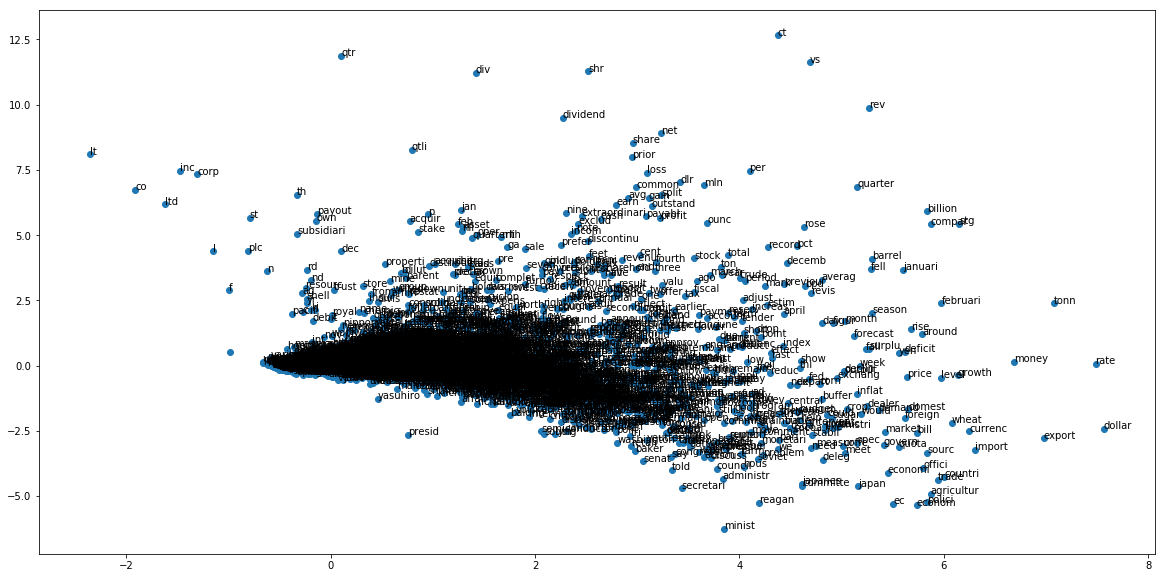

In [100]:
# create a scatter plot of the projection
figure(figsize=(20,10))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [101]:
model.wv.similarity('billion','compar')

0.74614488415313374

In [102]:
model.wv.similarity('billion','corp')

-0.0054619491333977033

## t-SNE representation

From: https://github.com/oreillymedia/t-SNE-tutorial

A popular dimensonality reduction algorithm: t-distributed stochastic neighbor embedding (t-SNE). Developed by Laurens van der Maaten and Geoffrey Hinton (see the original paper here: http://jmlr.csail.mit.edu/papers/volume9/vandermaaten08a/vandermaaten08a.pdf), this algorithm has been successfully applied to many real-world datasets. 

Let's adapt the code from this post: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

The nice thing is that the output model from Word2Vec feeds directly into this model! 

In [103]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        pyplot.scatter(x[i],y[i])
        pyplot.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    pyplot.show()

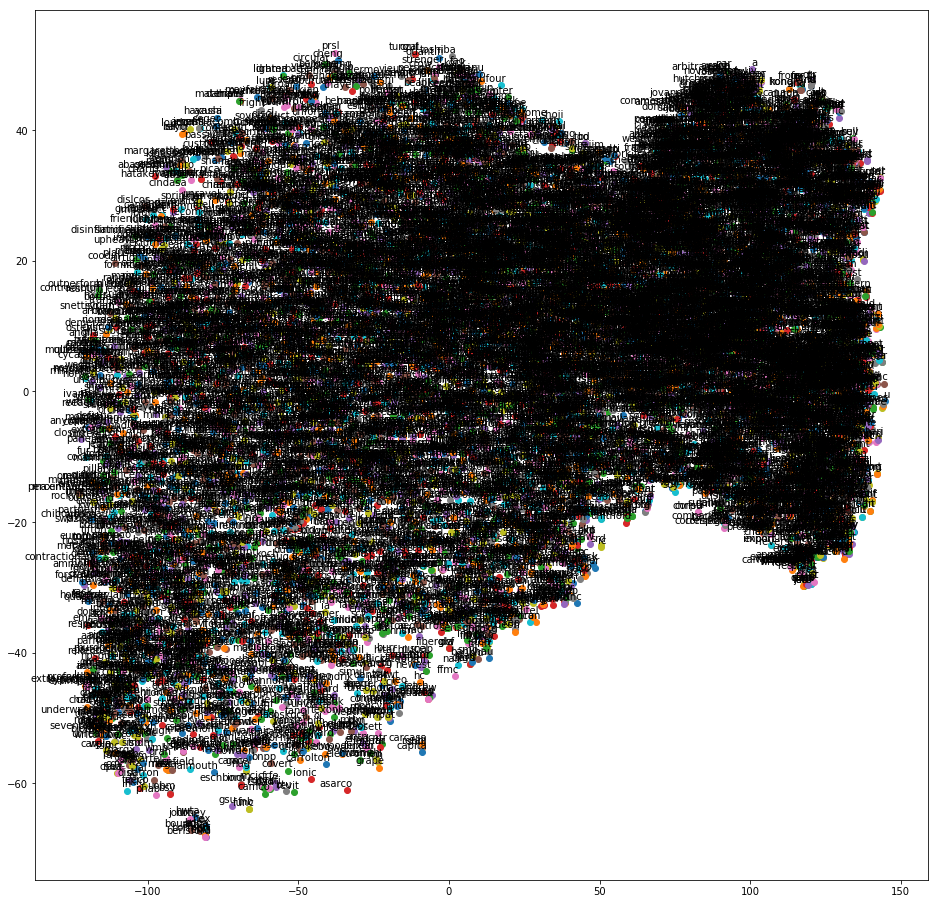

In [104]:
figure(figsize=(20,10))
tsne_plot(model)

In [ ]:
import nltk
nltk.download()